In [138]:
from obspy import read
import numpy as np
from scipy.signal import hilbert
import matplotlib.pyplot as plt

# Ruta al archivo .mseed
data_directory = '../../data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-07-20HR00_evid00011.mseed'
mseed_file = f'{data_directory}'

In [139]:
# Leer archivo MSEED
st = read(mseed_file)  # Cambia el nombre del archivo según corresponda
tr = st[0].copy()

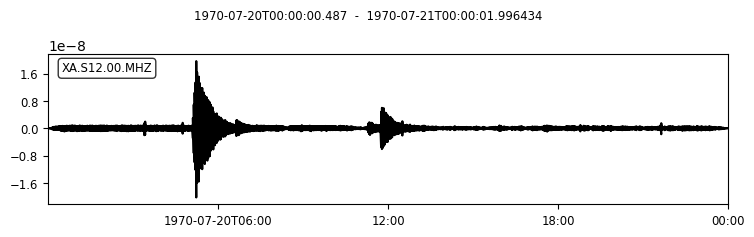

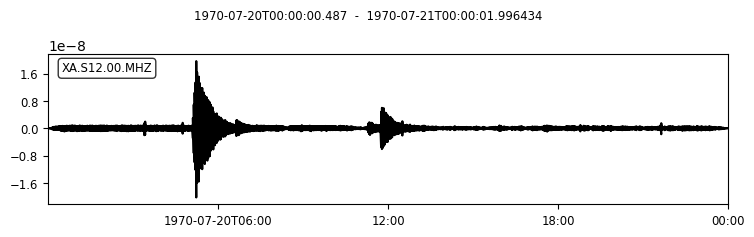

In [140]:
tr.plot()

In [141]:
minfreq = 0.5
tr.filter('highpass', freq=minfreq)

XA.S12.00.MHZ | 1970-07-20T00:00:00.487000Z - 1970-07-21T00:00:01.996434Z | 6.6 Hz, 572411 samples

In [142]:
# Obtener los tiempos de la traza y los datos
tr_times = tr.times()  # Tiempos en segundos
tr_data = tr.data 

In [144]:
# Preguntar al usuario cuántos sismos ha identificado
num_sismos = int(input("¿Cuántos sismos has identificado en la señal? "))

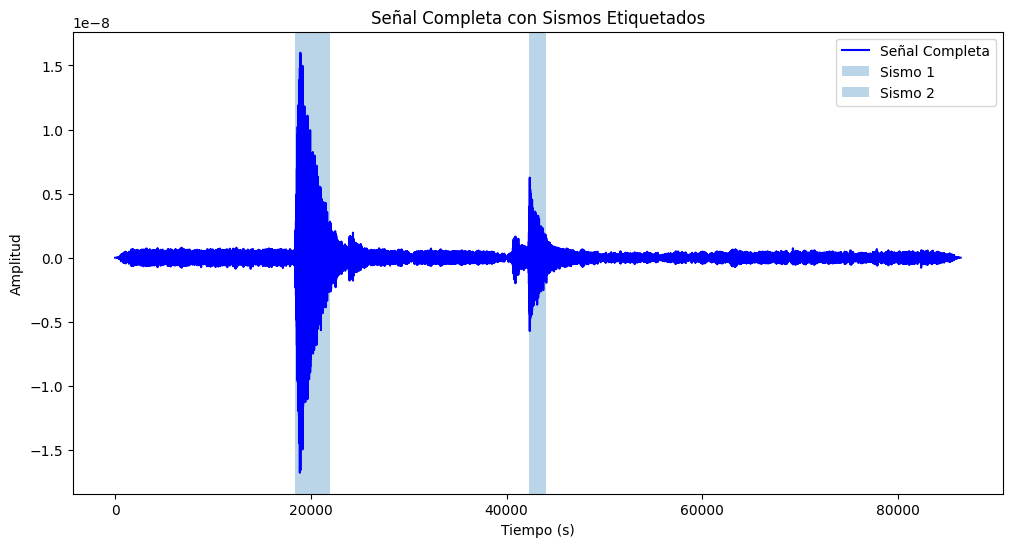

In [145]:
# Almacenar los tiempos de inicio y fin de cada sismo
sismos = []
for i in range(num_sismos):
    inicio_sismo = float(input(f"Introduce el tiempo de inicio del sismo {i+1} (en segundos): "))
    fin_sismo = float(input(f"Introduce el tiempo de fin del sismo {i+1} (en segundos): "))
    sismos.append((inicio_sismo, fin_sismo))


# Etiquetar toda la señal: 0 para ruido, 1 para sismos
etiquetas = [0] * len(tr_data)  # Inicialmente todo es ruido

for inicio, fin in sismos:
    inicio_idx = int(inicio / (tr_times[1] - tr_times[0]))
    fin_idx = int(fin / (tr_times[1] - tr_times[0]))
    for i in range(inicio_idx, fin_idx):
        etiquetas[i] = 1  # Marcar como sismo

# Visualizar la señal completa con los sismos etiquetados
plt.figure(figsize=(12, 6))

# Visualizar la señal completa
plt.plot(tr_times, tr_data, 'b-', label='Señal Completa')

# Visualizar los sismos seleccionados en la misma gráfica
for i, (inicio, fin) in enumerate(sismos):
    plt.axvspan(inicio, fin, alpha=0.3, label=f'Sismo {i+1}')

plt.title('Señal Completa con Sismos Etiquetados')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

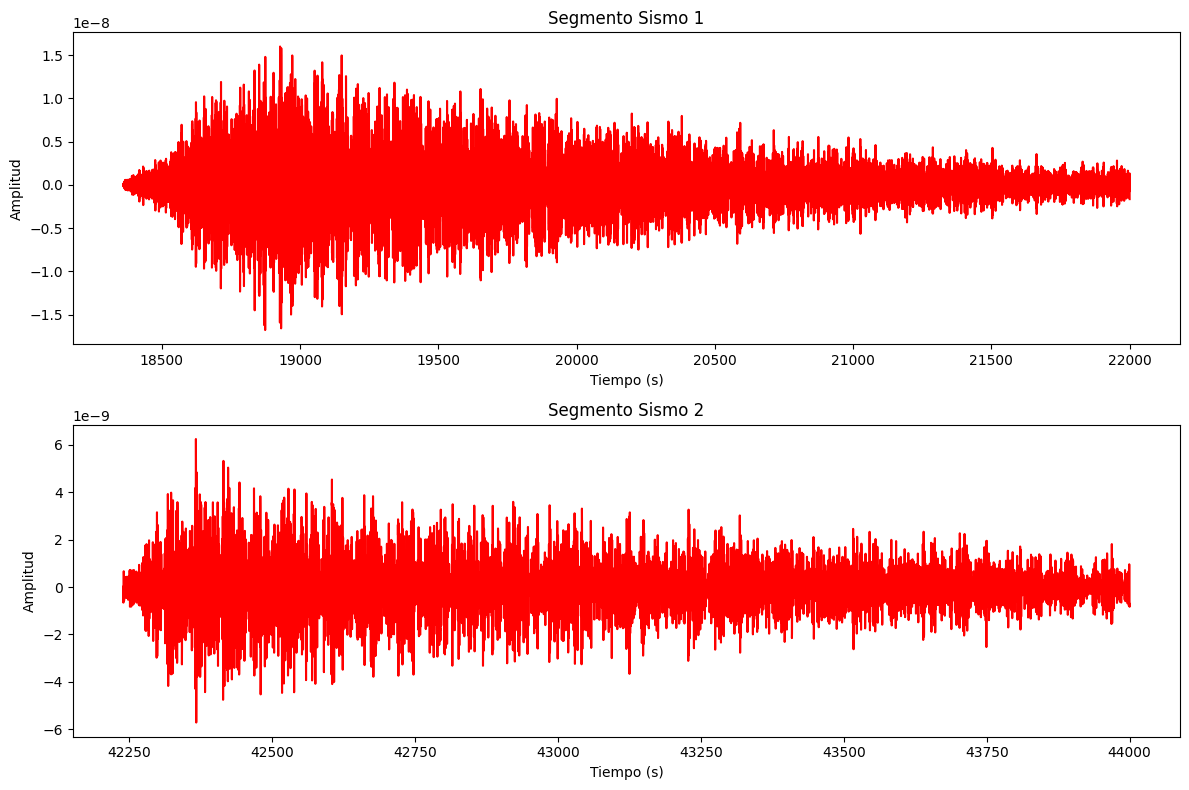

Datos de los sismos y ruido etiquetados guardados en 'sismos_etiquetados.csv'


In [149]:
# Visualizar cada segmento de sismo por separado
plt.figure(figsize=(12, 4 * num_sismos))

for i, (inicio, fin) in enumerate(sismos):
    tr_data_sismo = tr.slice(starttime=tr.stats.starttime + inicio, 
                            endtime=tr.stats.starttime + fin)

    plt.subplot(num_sismos, 1, i + 1)
    plt.plot(tr_data_sismo.times(reftime=tr.stats.starttime), tr_data_sismo.data, 'r-')
    plt.title(f'Segmento Sismo {i+1}')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

# Crear un DataFrame para almacenar las etiquetas y guardar en CSV
df_final = pd.DataFrame({
    'time': tr_times,
    'amplitude': tr_data,
    'label': etiquetas  # Etiqueta 0 para ruido, 1 para sismo
})


# Guardar en CSV
df_final.to_csv('sismos_etiquetados_evid000011.csv', index=False)

print("Datos de los sismos y ruido etiquetados guardados en 'sismos_etiquetados.csv'")